<a href="https://colab.research.google.com/github/LordLean/Machine-Learning/blob/master/Kaggle/ML_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexholder","key":"<>"}'}

In [2]:
# Make directory and copy.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#!pip install kaggle # Install kaggle.

# Change access permissions.
!chmod 600 /root/.kaggle/kaggle.json

#!kaggle datasets list # Lists kaggle datasets.

# Download using Kaggle API.
!kaggle competitions download -c brighton-a-memorable-city

# Unzip data
!unzip additional_training.csv
!unzip training.csv
!unzip testing.csv

# List files in dir.
!ls

  0% 0.00/30.0 [00:00<?, ?B/s]
100% 30.0/30.0 [00:00<00:00, 51.9kB/s]
 85% 73.0M/85.7M [00:01<00:00, 33.7MB/s]
100% 85.7M/85.7M [00:01<00:00, 53.9MB/s]
 64% 9.00M/14.2M [00:00<00:00, 22.8MB/s]
100% 14.2M/14.2M [00:00<00:00, 31.9MB/s]
  0% 0.00/81.9k [00:00<?, ?B/s]
100% 81.9k/81.9k [00:00<00:00, 86.1MB/s]
  0% 0.00/19.6k [00:00<?, ?B/s]
100% 19.6k/19.6k [00:00<00:00, 21.1MB/s]
  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 54.3MB/s]
Archive:  additional_training.csv.zip
  inflating: additional_training.csv  
Archive:  training.csv.zip
  inflating: training.csv            
Archive:  testing.csv.zip
  inflating: testing.csv             
additional_training.csv      sample_data		  test_proportions.csv
additional_training.csv.zip  sample_valid_submission.csv  training.csv
annotation_confidence.csv    testing.csv		  training.csv.zip
kaggle.json		     testing.csv.zip


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
train = pd.read_csv("/content/training.csv")
test = pd.read_csv("/content/testing.csv")
test_proportions = pd.read_csv("/content/test_proportions.csv")

In [5]:
print(train[:].head())
print(train[:].tail())

print(test[:].head())
print(test[:].tail())

   ID     CNNs   CNNs.1  CNNs.2  ...  GIST.509  GIST.510  GIST.511  prediction
0   1  0.00000  0.00000     0.0  ...  0.016819  0.013863  0.020987           1
1   2  0.00000  0.00000     0.0  ...  0.022172  0.025843  0.020629           1
2   3  0.00000  0.00000     0.0  ...  0.016838  0.018631  0.014774           1
3   4  0.21168  0.53031     0.0  ...  0.022226  0.041484  0.016790           1
4   5  0.00000  0.00000     0.0  ...  0.006265  0.006707  0.013045           1

[5 rows x 4610 columns]
      ID     CNNs   CNNs.1   CNNs.2  ...  GIST.509  GIST.510  GIST.511  prediction
242  243  0.00000  0.00000  0.00000  ...  0.045320  0.029119  0.022450           1
243  244  0.32344  0.36752  0.41601  ...  0.017803  0.033699  0.021059           1
244  245  0.00000  0.00000  0.00000  ...  0.042757  0.077547  0.029385           1
245  246  0.61978  0.00000  0.00000  ...  0.033392  0.048006  0.030306           1
246  247  0.00000  0.00000  0.00000  ...  0.027922  0.022340  0.010484           1

[5

Length match: True
Proportional Accuracy: 0.8309178743961353
   0    1
0  1   31
1  4  171


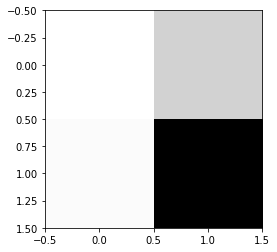

In [6]:
split_spot = 40

train_split_train = train.iloc[:split_spot, 1:-1].to_numpy(copy=True)
train_pred_train = train.iloc[:split_spot, -1].to_numpy(copy=True)
print("Length match: {}".format(len(train_split_train) == len(train_pred_train)))

train_split_test = train.iloc[split_spot: ,1:-1].to_numpy(copy=True)
train_pred_test = train.iloc[split_spot: ,-1].to_numpy(copy=True)

X = train_split_train
y = train_pred_train 

clf = MLPClassifier(solver="lbfgs", alpha=1e-5, random_state=1)

clf.fit(X,y)

predictions = clf.predict(train_split_test)

accuracy = 0 

for i, (p1,p2) in enumerate(zip(predictions, train_pred_test)):
  if p1 == p2:
    accuracy += 1

print("Proportional Accuracy: {}".format(accuracy / len(predictions)))


conf = confusion_matrix(train_pred_test, predictions)
df = pd.DataFrame(conf)
print(df)

plt.imshow(conf, cmap="binary", interpolation="None")
#plt.axis("off")
plt.show()

In [53]:
# Standardized Data

# Cut for all necesaary training values.
train_values = train.iloc[:, 1:-1]
# Get all observed predictions.
train_observed = train.iloc[:, -1]
# Compare to check equal length.
print("Equal Length: {}".format(len(train_values)==len(train_observed)))
# Pull .values() for test.
test_values = test.iloc[:,1:].to_numpy(copy=True)

# to_numpy() for extracting just values.
X = train_values.to_numpy(copy=True)
y = train_observed.to_numpy(copy=True) 

# Standardize training data.
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Standardize testing data.
test_values = scaler.transform(test_values)

Equal Length: True


In [0]:
# Split standardizer by hand. ---- Seems to be working.

df_cnn = train.iloc[:, 1:-513]
df_gist = train.iloc[:, -513:-1]

X_cnn = df_cnn.to_numpy(copy=True)
X_gist = df_gist.to_numpy(copy=True)

mean = X_cnn.mean()
std = X_cnn.std()

X_cnn = (X_cnn - mean) / std

mean = X_gist.mean()
std = X_gist.std()

X_gist = (X_gist - mean) / std

X_test = np.concatenate((X_cnn,X_gist),axis=1)

In [0]:
# Split standardizer by hand.

# Training data.
df_cnn = train.iloc[:, 1:-513]
df_gist = train.iloc[:, -513:-1]

X_cnn = df_cnn.to_numpy(copy=True)
X_gist = df_gist.to_numpy(copy=True)

# Testing data.
df_test_cnn = test.iloc[:,1:-512]
df_test_gist = test.iloc[:,-512:]

test_values_cnn = df_test_cnn.to_numpy(copy=True)
test_values_gist = df_test_gist.to_numpy(copy=True)

# Training scaling.
mean = X_cnn.mean()
std = X_cnn.std()

X_cnn = (X_cnn - mean) / std
test_values_cnn = (test_values_cnn - mean) / std

# Testing scaling.
mean = X_gist.mean()
std = X_gist.std()

X_gist = (X_gist - mean) / std
test_values_gist = (test_values_gist - mean) / std

#Create final np arrays for training/test.
X_test = np.concatenate((X_cnn,X_gist),axis=1)
test_values = np.concatenate((test_values_cnn,test_values_gist),axis=1)

In [76]:
print(X_cnn.shape,test_values_cnn.shape)
print(X_gist.shape,test_values_gist.shape)

(247, 4096) (11874, 4096)
(247, 512) (11874, 512)


In [0]:
# Params:

classifier_data = X_test

test_values_2 = test.iloc[:,1:].to_numpy(copy=True)


hddn_lyrs = (100,100,100,100)
mx_itr = 250

# No diff so far.
lr = { "c" : 'constant', "i": 'invscaling', "a":'adaptive'}

In [0]:
# Classifier.
clf = MLPClassifier(solver="lbfgs",
                    hidden_layer_sizes=hddn_lyrs,
                    max_iter=mx_itr,
                    alpha=1e-5,
                    random_state=1,
                    learning_rate=lr["c"]
                    )

clf.fit(classifier_data,y)

# Predictions.
predictions_final = clf.predict(test_values)

In [80]:
# Calculate extremely rough "accuracy" from proportion of data correct.

class_0 = 0
class_1 = 0

for val in predictions_final:
  if val == 0:
    class_0 += 1
  elif val == 1:
    class_1 += 1

total = len(predictions_final)

pred_0 = round((class_0 / total), 4)
pred_1 = round((class_1 / total), 4) 

actual_0 = float(test_proportions.iloc[0,0][:6])
actual_1 = round((1 - actual_0),4)

dif = abs(pred_0 - actual_0)
percent_dif = dif / np.mean([pred_0,actual_0]) * 100

print("Class 0 Non memorable: \nPredicted proportion: {} \nActual proportion:    {}\n".format(pred_0,actual_0))
print("Class 1 Memorable: \nPredicted proportion: {} \nActual proportion:    {}\n".format(pred_1,actual_1))
print("Percentage difference pred_0 and actual_0 is:\n{}%\nDifference of:\n{}".format(round(percent_dif,2), round(dif,4)))

Class 0 Non memorable: 
Predicted proportion: 0.2948 
Actual proportion:    0.6152

Class 1 Memorable: 
Predicted proportion: 0.7052 
Actual proportion:    0.3848

Percentage difference pred_0 and actual_0 is:
70.42%
Difference of:
0.3204


In [0]:
# 0.6152 class 0      non memorable.
# 0.3848 class 1      memorable.

In [0]:
# Create and download .csv file.
rnge = np.arange(1,len(predictions_final)+1)
df = pd.DataFrame({"ID": rnge, "prediction": predictions_final})
df.to_csv("submission1.csv", index=False)

In [83]:
!ls

additional_training.csv      sample_data		  testing.csv.zip
additional_training.csv.zip  sample_valid_submission.csv  test_proportions.csv
annotation_confidence.csv    submission1.csv		  training.csv
kaggle.json		     testing.csv		  training.csv.zip


In [84]:
# Run to submit to Kaggle competition.
!kaggle competitions submit brighton-a-memorable-city -f submission1.csv -m "woo"

100% 81.9k/81.9k [00:03<00:00, 22.5kB/s]
Successfully submitted to Brighton, a memorable city!

In [0]:
files.download("submission1.csv")

 <br>

In [0]:
# Total Data.
# Total Data.
# Total Data.
# Total Data.
# Total Data.

# Get all training values.
train_values = train.iloc[:, 1:-1].to_numpy(copy=True)
# Get all observed predictions.
train_observed = train.iloc[:, -1].to_numpy(copy=True)
# Compare to check equal length.
print(len(train_values))
print(len(train_observed))

# Non-standardized Data
X = train_values
y = train_observed 

# Values to test on.
test_values = test.iloc[:,1:].to_numpy(copy=True)

# Classifier.
clf = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(100,), max_iter=200, alpha=1e-5, random_state=1)

clf.fit(X,y)

# Predictions.
predictions_final = clf.predict(test_values)

           PC1        PC2  prediction
0   -16.916169  -2.736490           1
1    -0.520619  27.631201           1
2   -25.449642 -11.383133           1
3    25.396863 -25.939131           1
4   -22.679241 -22.238217           1
..         ...        ...         ...
242  15.903745   1.902198           1
243  23.974364  -3.685243           1
244 -13.254892  27.873253           1
245  23.423197  -5.449488           1
246   1.781705  -3.269530           1

[247 rows x 3 columns]


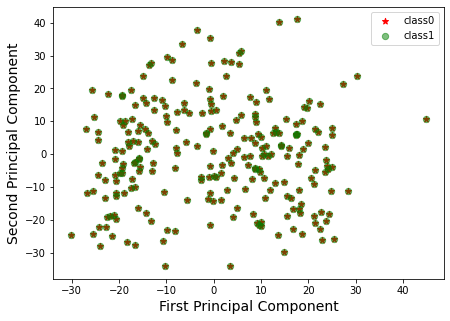

In [57]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data=principalComponents, columns=["PC1","PC2"])

finalDf = pd.concat([principalDf, train.iloc[:, -1]], axis = 1)

print(finalDf)


labels=train.iloc[:, -1]
cdict={0:'red',1:'green'}
labl={0:'class0',1:'class1'}
marker={0:'*',1:'o'}
alpha={0:1, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ax.scatter(finalDf["PC1"],finalDf["PC2"],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference